![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Outlier detection/quality screening: Generate flags that shows missing values
</b>
</span>

---
**Notebook version**: `1` (28 Aug 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- Generates flag with `0` = value is not missing and `2` = value is missing 

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import numpy as np

import diive.configs.exampledata as ed
from diive.core.plotting.timeseries import TimeSeries
from diive.pkgs.qaqc.flags import MissingValues

warnings.filterwarnings('ignore')
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.83.2


</br>

# **Docstring**

In [2]:
help(MissingValues)

Help on function MissingValues in module diive.pkgs.qaqc.flags:

MissingValues(series: pandas.core.series.Series, idstr: str = None, verbose: bool = False)
    Generate flag that indicates missing records in data
    ...
    
    Methods:
        calc(self, min: float, max: float): Calculates flag
    
    After running calc, results can be accessed with:
        flag: Series
            Flag series where accepted (ok) values are indicated
            with flag=0, rejected values are indicated with flag=2
        filteredseries: Series
            Data with rejected values set to missing



</br>

# **Load example data**

## Load and prepare data (one month)

In [3]:
df = ed.load_exampledata_parquet()
s = df['Tair_f'].copy()
s = s.loc[s.index.year == 2018].copy()
s = s.loc[s.index.month == 7].copy()
s

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.056 seconds). Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2018-07-01 00:15:00    13.014
2018-07-01 00:45:00    12.409
2018-07-01 01:15:00    12.418
2018-07-01 01:45:00    12.071
2018-07-01 02:15:00    12.182
                        ...  
2018-07-31 21:45:00    16.928
2018-07-31 22:15:00    16.276
2018-07-31 22:45:00    16.256
2018-07-31 23:15:00    15.763
2018-07-31 23:45:00    15.919
Freq: 30min, Name: Tair_f, Length: 1488, dtype: float64

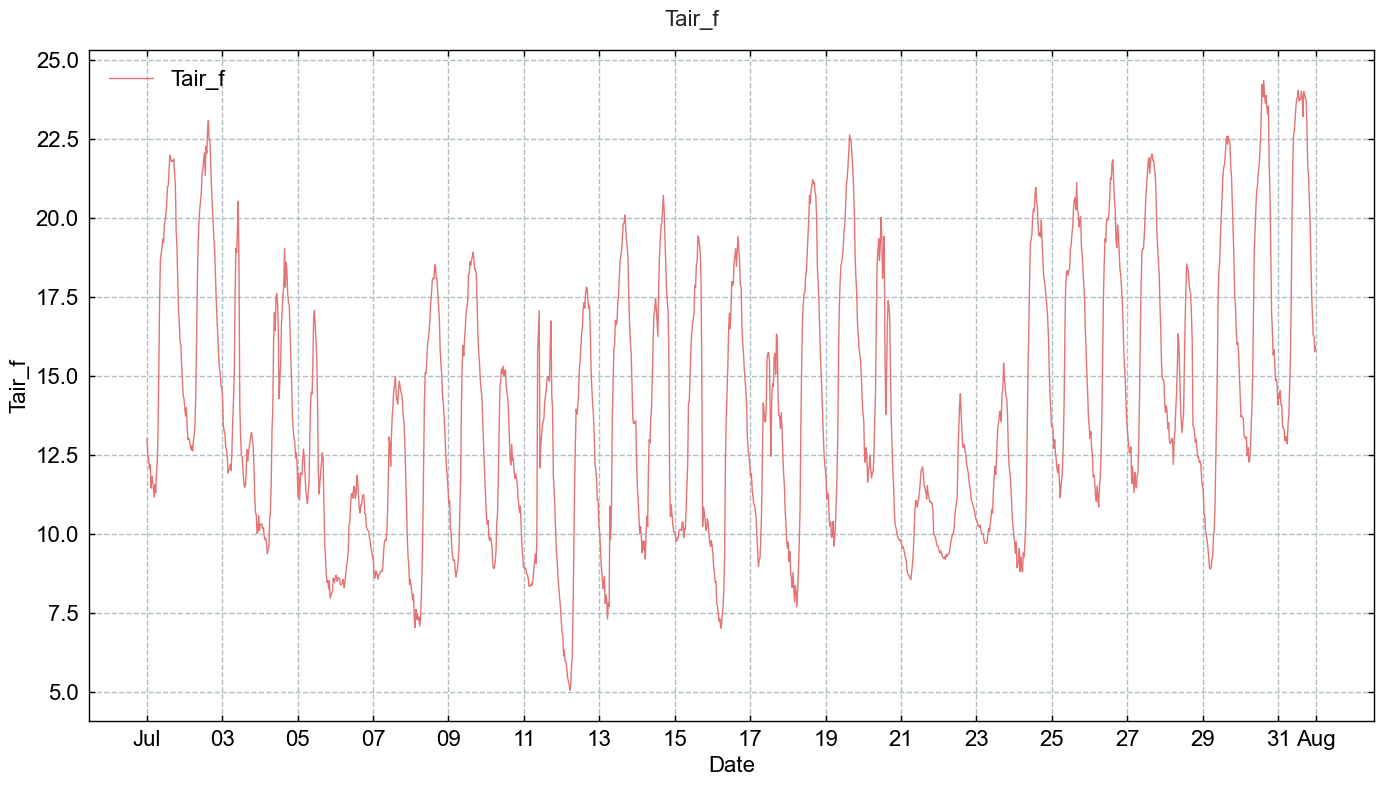

In [4]:
TimeSeries(s).plot();

## Delete some data points for testing

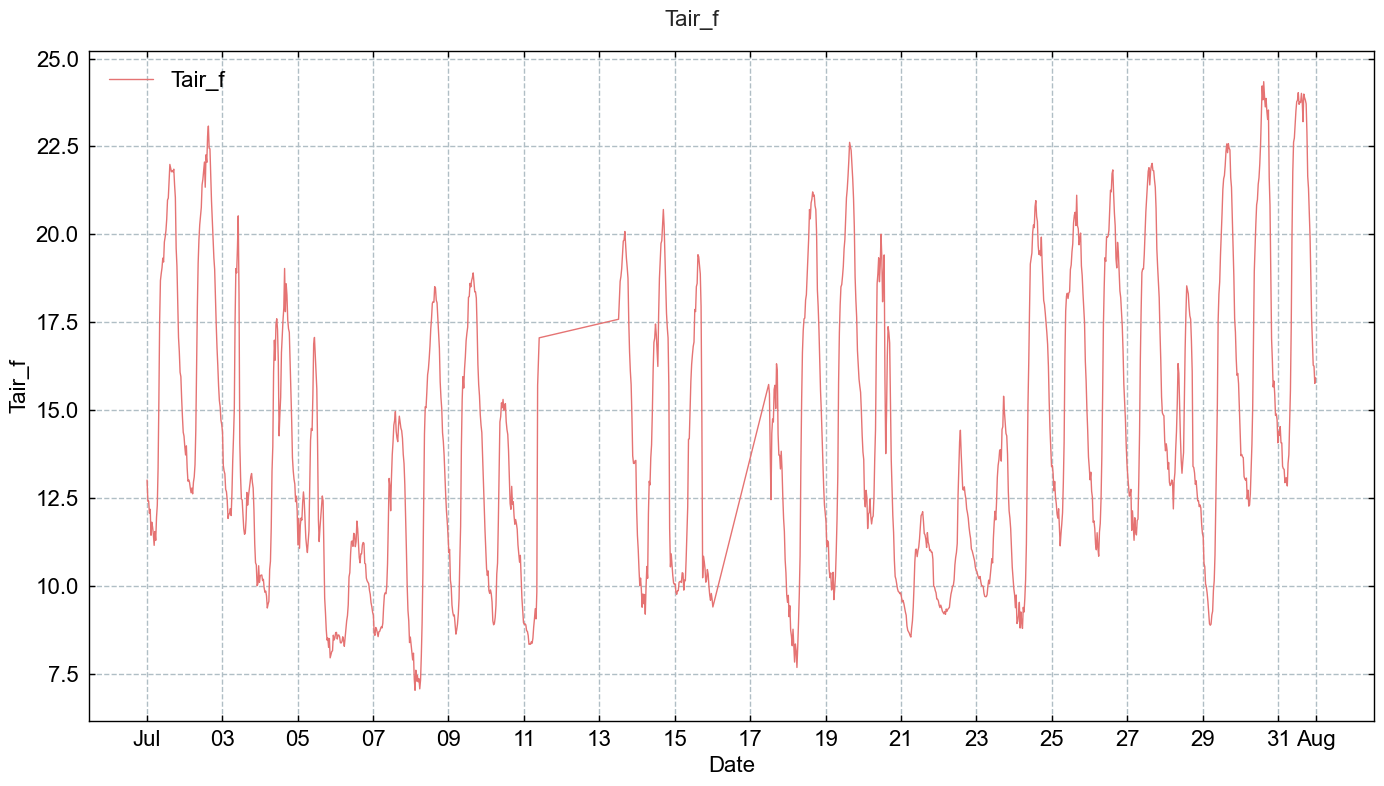

In [5]:
s.iloc[500:600] = np.nan
s.iloc[721:791] = np.nan
TimeSeries(s).plot();

</br>

# **Missing values** flag

## Calculate flag (0=data point not missing, 2=missing)

In [6]:
mv = MissingValues(series=s)
mv.calc()

[MissingValues]  running MissingValues ...


In [7]:
flag = mv.get_flag()
flag

TIMESTAMP_MIDDLE
2018-07-01 00:15:00    0.0
2018-07-01 00:45:00    0.0
2018-07-01 01:15:00    0.0
2018-07-01 01:45:00    0.0
2018-07-01 02:15:00    0.0
                      ... 
2018-07-31 21:45:00    0.0
2018-07-31 22:15:00    0.0
2018-07-31 22:45:00    0.0
2018-07-31 23:15:00    0.0
2018-07-31 23:45:00    0.0
Freq: 30min, Name: FLAG_Tair_f_MISSING_TEST, Length: 1488, dtype: float64

In [8]:
print(f"Number of missing values: {int(flag.loc[flag == 2].count())}")

Number of missing values: 170


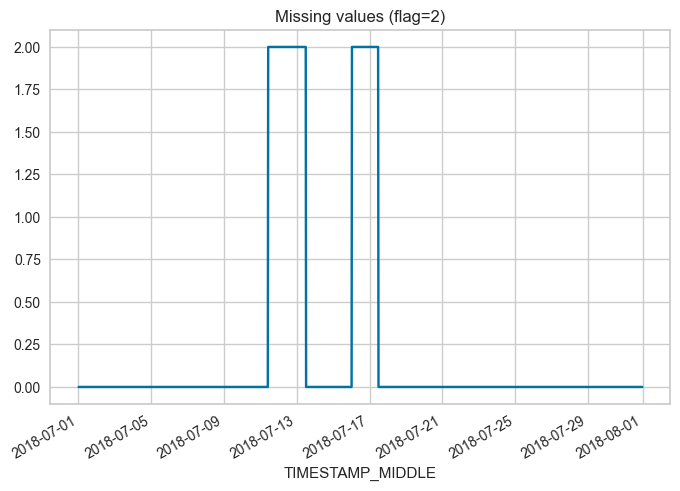

In [9]:
flag.plot(x_compat=True, title="Missing values (flag=2)");

</br>

# End of notebook

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-10-25 00:11:31
